In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
from sklearn.ensemble  import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

# DATA SET LOADING

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
#first five observations
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# Visualization

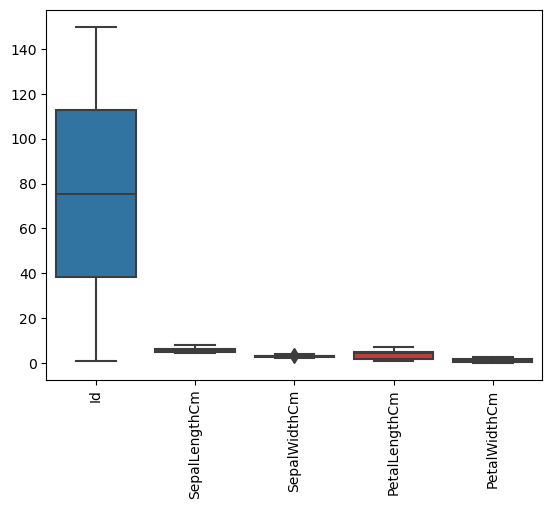

In [9]:
#outlier visualizaton
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [10]:
#the data set contain no missing values 

In [11]:
newdf=df.copy()

In [12]:
newdf.drop("Species",axis=1,inplace=True)

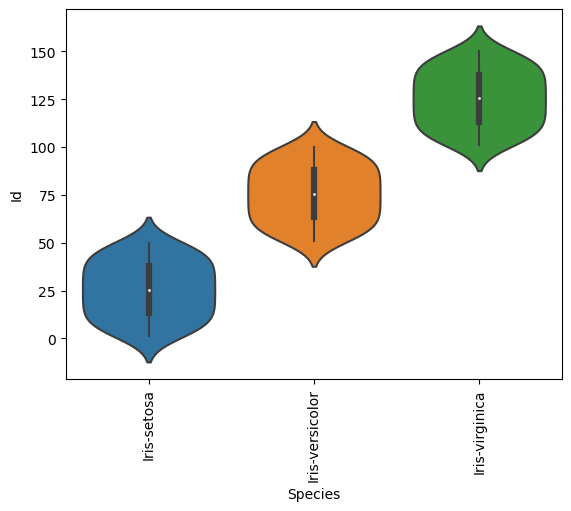

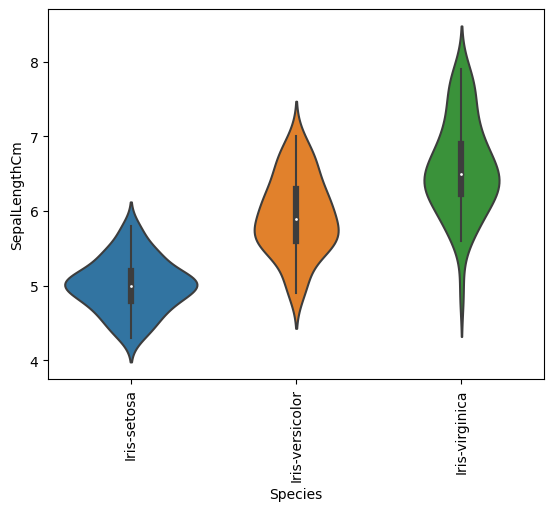

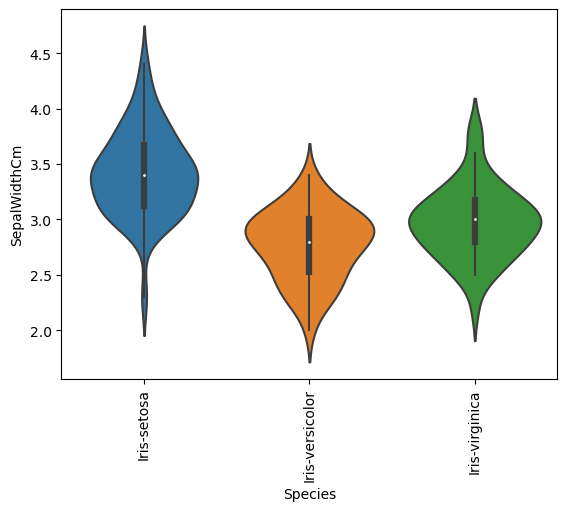

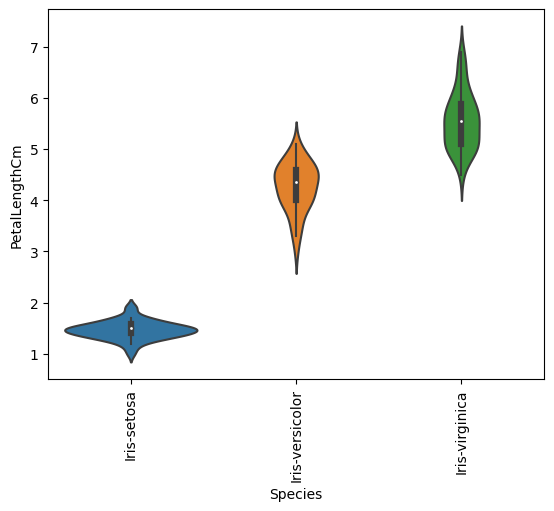

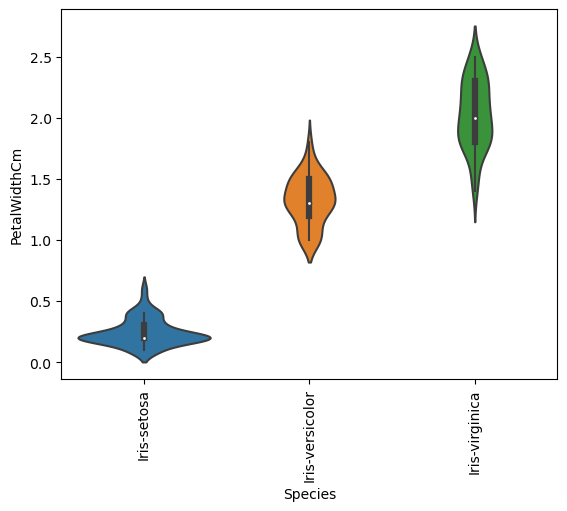

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in newdf.columns:
    plt.xticks(rotation=90)
    sns.violinplot(y=newdf[i], x=df["Species"])
    plt.show()  # This line will display each plot separately; remove it if you want all plots in one figure


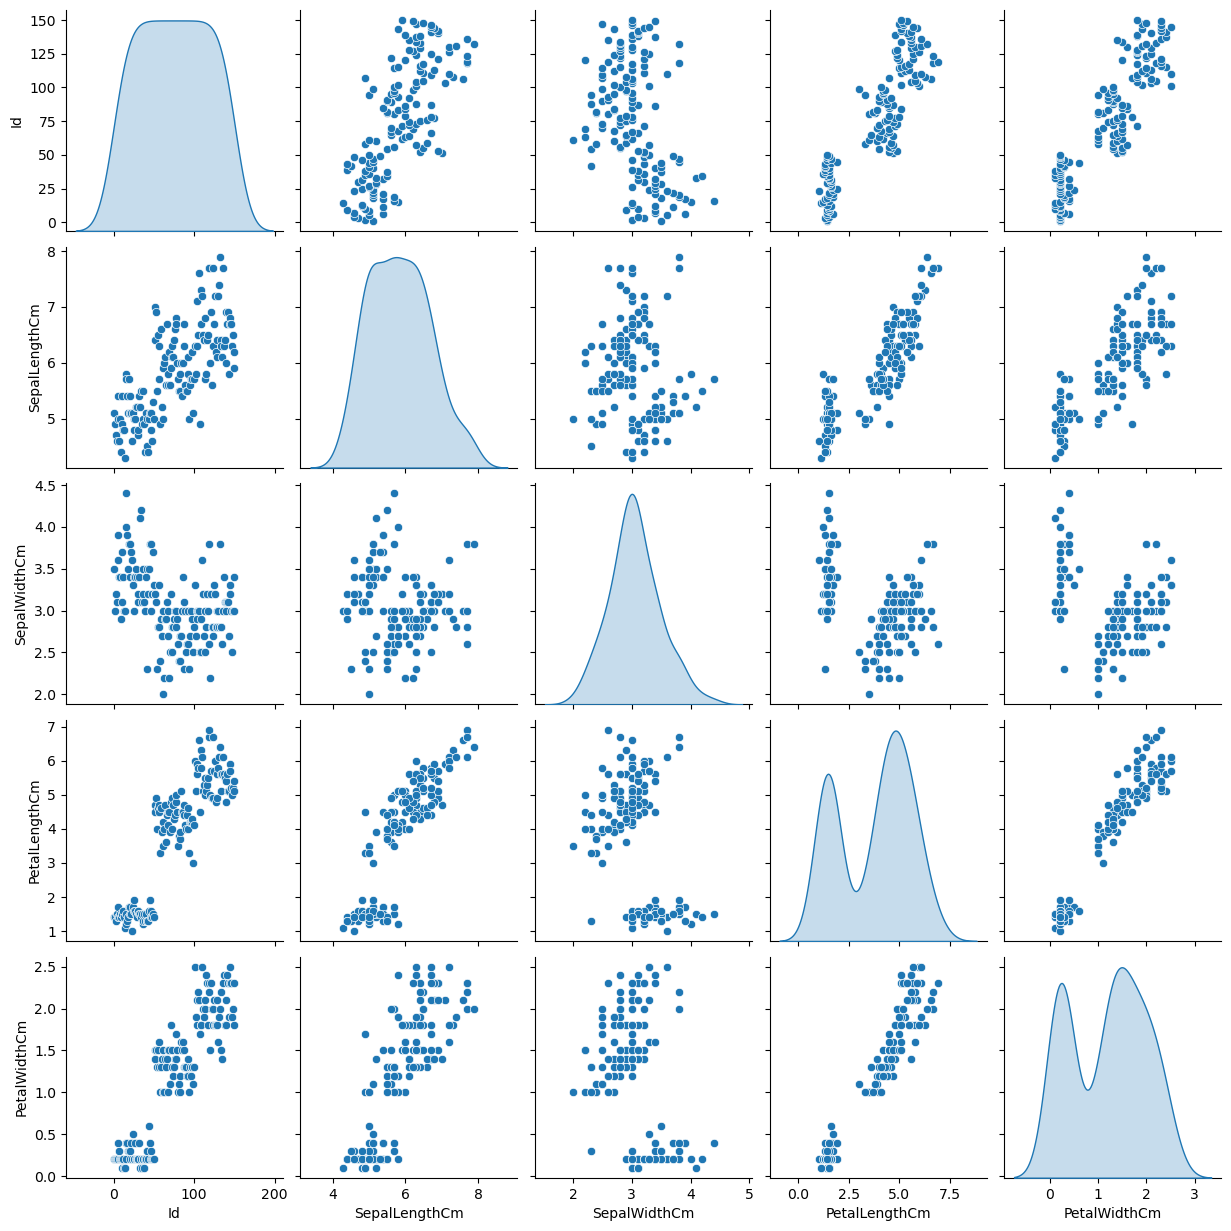

In [14]:
sns.pairplot(df,diag_kind="kde")
plt.show()

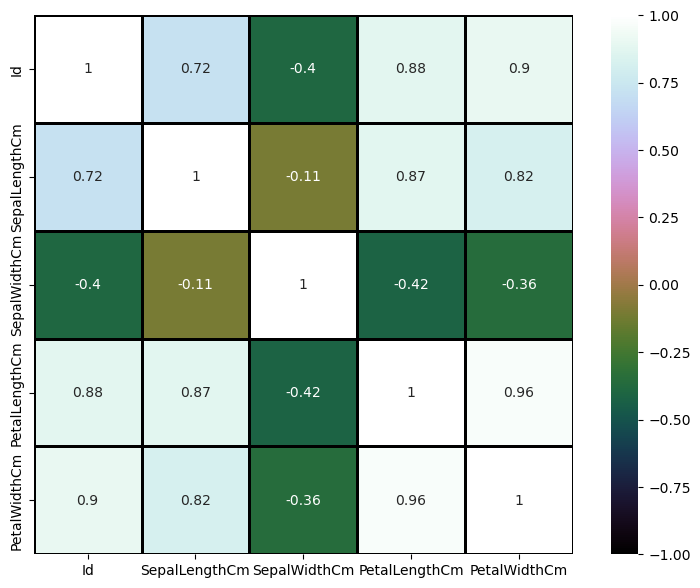

In [15]:
#Heat Maps
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(df.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

# Statistical Testing

In [16]:
import scipy.stats as stats

In [17]:
newdf.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [18]:
newdf

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [19]:
#normality of data
from scipy import stats

alpha = 0.05

for i in newdf.columns:
    _, p_value = stats.shapiro(newdf[i])
    
    if p_value < alpha:
        print(f"Reject H0 for column {i}: Data is not normal")
    else:
        print(f"Failed to reject H0 for column {i}: Data is normal")



Reject H0 for column Id: Data is not normal
Reject H0 for column SepalLengthCm: Data is not normal
Failed to reject H0 for column SepalWidthCm: Data is normal
Reject H0 for column PetalLengthCm: Data is not normal
Reject H0 for column PetalWidthCm: Data is not normal


In [20]:
import pandas as pd
from scipy.stats import chi2_contingency

alpha = 0.05

for i in newdf.columns:
  
    observed = pd.crosstab(newdf[i], df["Species"])

    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(observed)

    if p < alpha:
        print(f"Reject H0 for column {i}: No relationship between {i} and Species")
    else:
        print(f"Failed to reject H0 for column {i}: There is a significant relationship between {i} and Species")

    


Failed to reject H0 for column Id: There is a significant relationship between Id and Species
Reject H0 for column SepalLengthCm: No relationship between SepalLengthCm and Species
Reject H0 for column SepalWidthCm: No relationship between SepalWidthCm and Species
Reject H0 for column PetalLengthCm: No relationship between PetalLengthCm and Species
Reject H0 for column PetalWidthCm: No relationship between PetalWidthCm and Species


# Spliting the Data(For Training and Testing)

In [21]:
x=newdf.copy()

In [22]:
y=df["Species"]

In [31]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [35]:
y.replace({"Iris-setosa":0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

In [23]:
x_encod=pd.get_dummies(x,drop_first=True)

In [24]:
#scaling
from sklearn.preprocessing import StandardScaler

In [25]:
ss=StandardScaler()

In [26]:
x_scale=pd.DataFrame(ss.fit_transform(x_encod),index=x.index,columns=x.columns)

In [28]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scale,y,random_state=0,test_size=0.3)

In [37]:
np.mean(xtrain)

Id               0.057296
SepalLengthCm    0.060584
SepalWidthCm    -0.021377
PetalLengthCm    0.039752
PetalWidthCm     0.036812
dtype: float64

In [38]:
xtrain.shape

(105, 5)

In [39]:
ytrain.shape

(105,)

In [40]:
xtest.shape

(45, 5)

In [41]:
ytest.shape

(45,)

# MODEL BULIDING

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
import statsmodels.api as sm


In [44]:
ytrain.shape

(105,)

In [49]:
lr=LogisticRegression()
lr_model=lr.fit(xtrain,ytrain)

In [50]:
lr_predict=lr_model.predict(xtest)

In [53]:
print(classification_report(ytest,lr_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



***DECISION TREE***

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt=DecisionTreeClassifier()
dt_model=dt.fit(xtrain,ytrain)

In [56]:
dt_predict=dt_model.predict(xtest)

In [57]:
print(classification_report(ytest,dt_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      1.00      0.97        18
           2       1.00      0.91      0.95        11

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



# assumptions

Precision: The number of true positive predictions divided by the total number of positive predictions. It measures how many of the predicted positive instances were actually positive.

Recall (Sensitivity): The number of true positive predictions divided by the total number of actual positive instances. It measures how many of the actual positive instances were captured by the model.

F1-score: The harmonic mean of precision and recall. It provides a balance between precision and recall, especially when there is an imbalance between the classes.

Support: The number of actual occurrences of the class in the specified dataset.

Now, let's interpret the results:

Class 0:

Precision: 1.00
Recall: 1.00
F1-score: 1.00
Class 1:

Precision: 0.95
Recall: 1.00
F1-score: 0.97
Class 2:

Precision: 1.00
Recall: 0.91
F1-score: 0.95
Accuracy: 0.98 (Overall accuracy of the model on the entire dataset)

Macro Avg (average):

Precision: 0.98
Recall: 0.97
F1-score: 0.98
Weighted Avg (average):

Precision: 0.98
Recall: 0.98
F1-score: 0.98
These metrics provide a comprehensive overview of your model's performance across all classes. It seems like the model is performing well, with high precision, recall, and F1-scores.